In [2]:
import pandas as pd, matplotlib.pyplot as plt, tensorflow as tf, numpy as np
import random, itertools

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
from keras.utils import plot_model

In [356]:
from turtle import st
import pandas as pd, matplotlib.pyplot as plt, tensorflow as tf, os, codecs, json

class custom:
  class evaluation:
    def history_plot(history: tf.keras.callbacks.History() = None,
                     loaded_history = None,
                     path: str or bool = False, spe: str = "all",
                     name: str = "History_Plot",
                     grid: bool = False, scatter_node: bool = False,
                     markevery = 1,
                     figsize: tuple = (10, 10), filetype: str = ".jpeg"):
      # sourcery skip: none-compare, swap-if-else-branches
      """
      Plot data in the history object. Using Loaded Data from JSON File or model.history.

      Args:
          history (tf.keras.model.history): History Data fresh from trained(fit) Model. Defaults to None.
          loaded_history (loaded json file): History Data from Saved JSON file. Defaults to None.
          path (str or bool, optional): Directory File to save plot. Saved will be done. Defaults to False.
          spe (str, optional): Plot specific data. Defaults to "all".
          name (str, optional): Name of file. Defaults to "History_Plot".
          grid (bool, optional): Set display of Grid. Defaults to False.
          scatter_node (bool, optional): Set Scatter. Defaults to False.
          markevery (int, optional): Set Mark Every. Defaults to 1.
          figsize (tuple, optional): Set Figure Size. Defaults to (10, 10).
          filetype (str, optional): Set File type. ".jpeg", ".jpg, ".png". Defaults to ".jpeg".

      Returns:
          status: report back status.
      """
      plt.figure(figsize=figsize)
      
        # check if history or json file and all data or specific data
      if history != None:
        # All data or specific data
        pd.DataFrame(history.history if spe == "all" else history.history[spe]).plot(style = ".-" if scatter_node else "-", markevery = markevery)
      else:
        pd.DataFrame(loaded_history if spe == "all" else loaded_history[spe]).plot(style = ".-" if scatter_node else "-", markevery = markevery)
        
      plt.xlabel("Epochs")
      name = name + "_" + spe
      plt.title(name.replace("_", " ").capitalize())
      plt.grid(grid)

      if path:
        if path is bool:
          path = "./"
        if path[-1] != "/":
          path += "/"
        os.makedirs(path, exist_ok = True)
        dir = path + name.replace(" ", "_") + filetype
        try:
          plt.savefig(dir)
          return print("History Plot Saved @ " + dir)
        except BaseException:
          return print("Failed to Save History Plot")
        
      return print(name)
# -----------------------------------------------------------------------------------------------
    def learning_rate_plot(history: tf.keras.callbacks.History() = None,
                           loaded_history = None,
                           name: str = "Learning_Rate_Plot",
                           path: str or bool = False,
                           scatter_node: bool = False, grid: bool = False,
                           epochs: int = 5, divisible: int = 1,
                           figsize: tuple = (10, 10), spe: str = "loss",
                           markevery: int = 1,
                           filetype: str = ".jpeg"):
      """Plot the Learning Plot of the Model.

      Args:
          history (tf.keras.models.history): History Data fresh from trained(fit) Model. Default to None.
          loaded_history (loaded json file): History Data from Saved JSON file. Defaults to None.
          name (str, optional): Name of file. Defaults to "Learning_Rate_Plot".
          path (str or bool, optional): Directory File to save plot. Defaults to False.
          scatter_node (bool, optional): Set Scatter. Defaults to False.
          grid (bool, optional): Set Grid. Defaults to False.
          epochs (int, optional): Set of Generation of training. Defaults to 5.
          divisible (int, optional): splitting of for plot. Defaults to 1.
          figsize (tuple, optional): Set Figure Size. Defaults to (10, 10).
          spe (str, optional): Plot Specification. Defaults to "loss".
          markevery (int, optional): Set Mark Every. Defaults to 1.
          filetype (str, optional): Set file type. Defaults to ".jpeg".

      Returns:
          status: Report back status.
      """
      
      try:
        if history.history["lr"] or history["lr"]:
          lrs = 1e-4 * (10 ** (tf.range(epochs)/divisible))
          plt.figure(figsize = figsize)
          plt.grid(grid)
          
          try:
            if history:
              plt.semilogx(lrs, history.history[spe],
                           ".-" if scatter_node else "-")
            else:
              plt.semilogx(lrs, history[spe], 
                           ".-" if scatter_node else "-")
          except:
            return print("Invalid Specification of data at lrs or spe")
            
          plt.xlabel("Learning Rate")
          plt.ylabel(spe.capitalize())
          plt.title(f"Learning Rate vs {spe.capitalize()}")
          
          if path:
            if path is bool:
              path = "./"
            if path[-1] != "/":
              path += "/"
              os.makedirs(path, exist_ok = True)
            dir = path + name.replace(" ", "_") + filetype
            try:
              plt.savefig(dir)
              return print("Learning Plot Saved @ " + dir)
            except:
              return print("Failed to Save Learning Plot")
          
          return print(name)
        print("There is no Learning Rate in the History Data..")
      except:
        print("There is no Learning Rate in the History Data")
# -----------------------------------------------------------------------------------------------
    def plot_decision_boundary(model: tf.keras.models.Model(), x, y, 
                               path: str or bool = None, name: str = "Decision_Boundary",):
      """Plot the decision boundary of the model.

      Args:
          model (tf.keras.models.Model): model decision making to be plotted.
          x ([type]): Feature
          y ([type]): Label
          path (str or bool, optional): Directory File to save plot. Defaults to None.
          name (str, optional): Name of file. Defaults to "Decision_Boundary".
      """

      # Define the axis boundary of the plot
      x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
      y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
      
      # Mesh Grid
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                          np.linspace(y_min, y_max, 100))
      
      # Create x value
      x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack of 2D arrays
      
      y_pred = model.predict(x_in)
      
      # check for multi-class
      if len(y_pred[0]) > 1:
        plt.xlabel("Doing Multi-class Classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
      else:
        plt.xlabel("Doing Binary Classification")
        y_pred = np.around(np.round(y_pred).reshape(xx.shape), 3)
        
        
      plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
      plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap =plt.cm.RdYlBu)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      
      if path:
        if path is bool:
          path = "./"
        if path[-1] != "/":
          path += "/"
        os.makedirs(path, exist_ok = True)
        plt.savefig(path + name + ".png")
# -----------------------------------------------------------------------------------------------
  class load_save:
    def save(path: str = "./",
             name: str = "Model",
             history: tf.keras.callbacks.History() = None,
             model: tf.keras.models.Model() = None):
      """Save files of model and/or history into H5 and JSON format.
      
      Args:
          path (str, optional): Directory File to save plot. Saved will be done. Defaults to "./".
          name (str, optional): Name of file. Defaults to "Model".
          history (tf.keras.models.history): History Data fresh from trained(fit) Model. Default to None.
          model (tf.keras.models.model): Model to be saved. Defaults to None.
      
      Return:
        status : Report back status.
      """
      
      if history is None and model is None:
        return print("No Model or History Data to Save")
      
      os.makedirs(path, exist_ok = True)
      dir = path + name
      try:
        if model:
          model.save(dir + ".h5")
          print("Model Saved @ " + dir + ".h5")
      except:
        return print("Failed to Save Model")
      try:
        if history:
          new_hist = {}
          for key in list(history.history.keys()):
            new_hist[key]=history.history[key]
            if type(history.history[key]) == np.ndarray:
              new_hist[key] = history.history[key].tolist()
            elif type(history.history[key]) == list:
              if  type(history.history[key][0]) == np.float64:
                new_hist[key] = list(map(float, history.history[key]))
              if  type(history.history[key][0]) == np.float32:
                new_hist[key] = list(map(float, history.history[key]))
          with codecs.open(dir + ".json", 'w', encoding='utf-8') as file:
            json.dump(new_hist, file, separators=(',', ':'), sort_keys=True, indent=4) 
          print("Model History Saved @ " + dir + ".json")
      except:
        return print("Failed to Save History Object")
      try:
        plot_model(model, 
                   to_file = dir + "_diagram.png", 
                   show_shapes = True)
        
      except:
        return print("failed to save Architecture")
# -----------------------------------------------------------------------------------------------
    def load(history_dir: str = None, model_dir: str = None):
      """Load History and/or Model from H5 and JSON format.

      Args:
          history_dir (str, optional): Directory file of Model History. Defaults to None.
          model_dir (str, optional): Directory file of Model. Defaults to None.

      Returns:
          history (tupple): History Data from JSON file. for history_dir.
          model (tf.keras.models): Model from H5 file. for model_dir.
          (history, model)
      """
      try:
        if history_dir:
          with codecs.open(history_dir, 'r', encoding = 'utf-8') as file:
            h = json.loads(file.read())
            
        if model_dir:
          m = tf.keras.models.load_model(model_dir)
        
        if history_dir and model_dir:
          return h, m
        elif model_dir:
          return m
        else:
          return h
      except:
        return print("Failed to Load Model and/or History")
      
_custom = custom()

> Hyperparameter that can be changed to improve the architecture of the model
- Input Layer Shape(Features)
- Hidden Layer Shape
- Neurons per Hidden Layer
- Output Layer Shape(Labels)
- Hidden Activation
- Output Activation
- Loss Function
- Optimizer

# Chapter 1: Binary Classification (circle)

> Simple data to start the Learning

## Data Preparation for sampling

In [138]:
n_samples = 10000

x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 14)

In [139]:
# Features
x

array([[ 0.66797543,  0.44625262],
       [ 0.98345824, -0.24019915],
       [-0.15580147,  0.98663907],
       ...,
       [-0.98558583,  0.0390013 ],
       [ 0.57955444, -0.51223135],
       [-0.90904695, -0.26138754]])

In [140]:
# Labels
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [148]:
# Random Evaluation
index = np.random.randint(0, n_samples)
print(f"Index : {index}, Features : {x[index]}, Label : {y[index]}")

Index : 4705, Features : [0.29074716 0.93580643], Label : 0


In [149]:
# table the data
circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.667975,0.446253,1
1,0.983458,-0.240199,0
2,-0.155801,0.986639,0
3,-0.545950,-0.543123,1
4,0.449686,-0.670767,1
...,...,...,...
9995,-0.791600,-0.021202,1
9996,-0.220432,0.776044,1
9997,-0.985586,0.039001,0
9998,0.579554,-0.512231,1


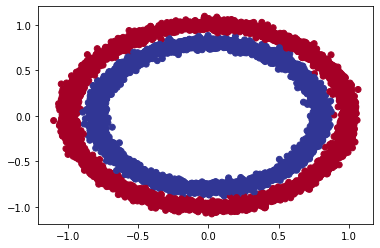

In [150]:
# Visualize with a plot
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [152]:
# check the shape of the data
x[1].shape
# 2 means binary

(2,)

## Data Splitting

In [158]:
limit = int(0.8 * x[:, 1].size)
x_train = x[:limit]
y_train = y[:limit]
x_test = x[limit:]
y_test = y[limit:]
print(f"x has {x.shape}, train x has {x_train.shape}, test x has {x_test.shape}")
print(f"y has {y.shape}, train y has {y_train.shape}, test y has {y_test.shape}")


x has (10000, 2), train x has (8000, 2), test x has (2000, 2)
y has (10000,), train y has (8000,), test y has (2000,)


## Modeling
- Model Architecture Defining
- Compilation
- Fitting/Training the Model

### Model 0: Base Model

In [181]:
# Modeling
circle_m0 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, name = "output_layer")
], name = "Circle_Classification_Model_0")

# Compiling
  # Three types of declaring what to use
  # 1. complete ex. tf.keras.optimizers.Adam()
  # 1.a. declare at the import to only use Adam()
  # 2. Name in Quotation marks ex. "Adam"
  # 3. Name in Quotation marks and Brackets ex. ["accuracy", "mse"]
circle_m0.compile(
  loss = 'BinaryCrossentropy',
  optimizer = tf.keras.optimizers.Adam(),
  metrics = 'accuracy'
)

# Fitting
circle_m0_h = circle_m0.fit(x_train, y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 4.2856 - accuracy: 0.4661
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 4.1404 - accuracy: 0.4691
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 3.9651 - accuracy: 0.4750
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 3.8123 - accuracy: 0.4757
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 3.7003 - accuracy: 0.4784
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 3.5984 - accuracy: 0.4798
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 3.4634 - accuracy: 0.4812
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 3.1300 - accuracy: 0.4840
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 2.1152 - accuracy: 0.4880
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.9195 - accuracy: 0.4915

In [182]:
eval_circle_m0 = circle_m0.evaluate(x_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.8867 - accuracy: 0.4805


History Plot Saved @ ./saved_files/NNCSummary/circle/model_0/Circle_Classification_Model_0_all.jpeg


<Figure size 720x720 with 0 Axes>

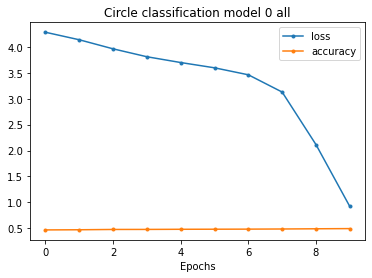

In [193]:
_custom.evaluation.history_plot(circle_m0_h, scatter_node = True,
                                path = "./saved_files/NNCSummary/circle/model_0",
                                name = "Circle_Classification_Model_0")

In [191]:
print(f"Training Loss:{circle_m0_h.history['loss'][-1]} vs Evaluation Loss:{eval_circle_m0[0]}")
print(f"Training Accuracy:{circle_m0_h.history['accuracy'][-1]} vs Evaluation Accuracy:{eval_circle_m0[1]}")


Training Loss:0.9195377826690674 vs Evaluation Loss:0.8866770267486572
Training Accuracy:0.49149999022483826 vs Evaluation Accuracy:0.4805000126361847


In [365]:
_custom.load_save.save(path = "./saved_files/NNCSummary/circle/model_0/", 
                       history = circle_m0_h,
                       model = circle_m0,
                       name = "Circle_Classification_Model_0")

Model Saved @ ./saved_files/NNCSummary/circle/model_0/Circle_Classification_Model_0.h5
Model History Saved @ ./saved_files/NNCSummary/circle/model_0/Circle_Classification_Model_0.json


### Model 1: 

In [210]:
circle_m1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, name = "output_layer")
], name = "Circle_Classification_Model")

circle_m1.compile(
  loss = 'BinaryCrossentropy',
  optimizer = tf.keras.optimizers.Adam(),
  metrics = 'accuracy'
)

circle_m1_h = circle_m1.fit(x_train, y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5.6351 - accuracy: 0.4807
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 5.3320 - accuracy: 0.4762
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 4.6811 - accuracy: 0.4711
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 4.5894 - accuracy: 0.4697
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 4.5277 - accuracy: 0.4692
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 4.4339 - accuracy: 0.4719
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 4.2489 - accuracy: 0.4761
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 4.0620 - accuracy: 0.4766
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 3.8527 - accuracy: 0.4773
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 3.6649 - accuracy: 0.4766

In [211]:
eval_circle_m1 = circle_m1.evaluate(x_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4815


History Plot Saved @ ./saved_files/NNCSummary/circle/model_1/Circle_Classification_Model_1_all.jpeg


<Figure size 720x720 with 0 Axes>

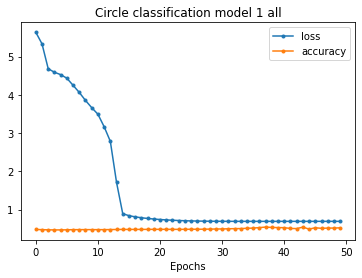

In [212]:
_custom.evaluation.history_plot(circle_m1_h, scatter_node = True,
                                path = "./saved_files/NNCSummary/circle/model_1",
                                name = "Circle_Classification_Model_1")

In [213]:
print(f"Training Loss:{circle_m1_h.history['loss'][-1]} vs Evaluation Loss:{eval_circle_m1[0]}")
print(f"Training Accuracy:{circle_m1_h.history['accuracy'][-1]} vs Evaluation Accuracy:{eval_circle_m1[1]}")

Training Loss:0.6933661103248596 vs Evaluation Loss:0.6933969855308533
Training Accuracy:0.5238749980926514 vs Evaluation Accuracy:0.4814999997615814


In [366]:
_custom.load_save.save(path = "./saved_files/NNCSummary/circle/model_1/", 
                       history = circle_m1_h,
                       model = circle_m1,
                       name = "Circle_Classification_Model_1")

Model Saved @ ./saved_files/NNCSummary/circle/model_1/Circle_Classification_Model_1.h5
Model History Saved @ ./saved_files/NNCSummary/circle/model_1/Circle_Classification_Model_1.json


### Model 2:

In [215]:
circle_m2 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, name = "hidden_layer"),
  tf.keras.layers.Dense(1, name = "output_layer")
], name = "Circle_Classification_Model")

circle_m2.compile(
  loss = 'BinaryCrossentropy',
  optimizer = tf.keras.optimizers.Adam(),
  metrics = 'accuracy'
)

circle_m2_h = circle_m2.fit(x_train, y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 4s 4ms/step - loss: 1.2522 - accuracy: 0.4864
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6946 - accuracy: 0.4710
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5064
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.5092
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5096
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.5005
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.5074
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.5102
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.5065
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.5136

In [216]:
eval_circle_m2 = circle_m2.evaluate(x_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4780


History Plot Saved @ ./saved_files/NNCSummary/circle/model_2/Circle_Classification_Model_2_all.jpeg


<Figure size 720x720 with 0 Axes>

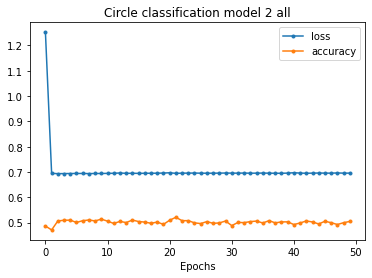

In [217]:
_custom.evaluation.history_plot(circle_m2_h, scatter_node = True,
                                path = "./saved_files/NNCSummary/circle/model_2",
                                name = "Circle_Classification_Model_2")

In [218]:
print(f"Training Loss:{circle_m2_h.history['loss'][-1]} vs Evaluation Loss:{eval_circle_m2[0]}")
print(f"Training Accuracy:{circle_m2_h.history['accuracy'][-1]} vs Evaluation Accuracy:{eval_circle_m2[1]}")

Training Loss:0.6954511404037476 vs Evaluation Loss:0.6938284635543823
Training Accuracy:0.5044999718666077 vs Evaluation Accuracy:0.4779999852180481


In [367]:
_custom.load_save.save(path = "./saved_files/NNCSummary/circle/model_2/", 
                       history = circle_m2_h,
                       model = circle_m2,
                       name = "Circle_Classification_Model_2")

Model Saved @ ./saved_files/NNCSummary/circle/model_2/Circle_Classification_Model_2.h5
Model History Saved @ ./saved_files/NNCSummary/circle/model_2/Circle_Classification_Model_2.json


### Model 3:

In [220]:
circle_m3 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = 'relu', name = "hidden_layer"),
  tf.keras.layers.Dense(2, name = "output_layer")
], name = "Circle_Classification_Model")

circle_m3.compile(
  loss = 'BinaryCrossentropy',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'accuracy'
)

circle_m3_h = circle_m3.fit(x_train, y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.7129 - accuracy: 0.4361
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.4575
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.4499
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0187 - accuracy: 0.4209
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.4212
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0108 - accuracy: 0.4069
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0150 - accuracy: 0.4014
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0129 - accuracy: 0.3996
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.4162
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0079 - accuracy: 0.4246

In [221]:
eval_circle_m3 = circle_m3.evaluate(x_test, y_test)

63/63 [==============================] - 2s 4ms/step - loss: 0.0015 - accuracy: 0.7700


History Plot Saved @ ./saved_files/NNCSummary/circle/model_3/Circle_Classification_Model_3_all.jpeg


<Figure size 720x720 with 0 Axes>

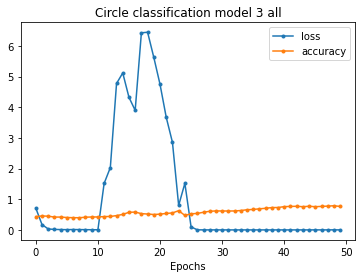

In [222]:
_custom.evaluation.history_plot(circle_m3_h, scatter_node = True,
                                path = "./saved_files/NNCSummary/circle/model_3",
                                name = "Circle_Classification_Model_3")

In [223]:
print(f"Training Loss:{circle_m3_h.history['loss'][-1]} vs Evaluation Loss:{eval_circle_m3[0]}")
print(f"Training Accuracy:{circle_m3_h.history['accuracy'][-1]} vs Evaluation Accuracy:{eval_circle_m3[1]}")

Training Loss:0.0030519720166921616 vs Evaluation Loss:0.0014971918426454067
Training Accuracy:0.7678750157356262 vs Evaluation Accuracy:0.7699999809265137


In [368]:
_custom.load_save.save(path = "./saved_files/NNCSummary/circle/model_3/", 
                       history = circle_m3_h,
                       model = circle_m3,
                       name = "Circle_Classification_Model_3")

Model Saved @ ./saved_files/NNCSummary/circle/model_3/Circle_Classification_Model_3.h5
Model History Saved @ ./saved_files/NNCSummary/circle/model_3/Circle_Classification_Model_3.json


### Model 4:

In [225]:
circle_m4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu', name = "hidden_layer_1"),
   tf.keras.layers.Dense(50, activation = 'relu', name = "hidden_layer_2"),
  tf.keras.layers.Dense(1, activation = 'relu', name = "output_layer")
], name = "Circle_Classification_Model")

circle_m4.compile(
  loss = 'BinaryCrossentropy',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'accuracy'
)

circle_m4_h = circle_m4.fit(x_train, y_train, epochs = 50, verbose = 2)

Epoch 1/50
250/250 - 3s - loss: 0.4916 - accuracy: 0.7109 - 3s/epoch - 11ms/step
Epoch 2/50
250/250 - 1s - loss: 0.0278 - accuracy: 0.9929 - 831ms/epoch - 3ms/step
Epoch 3/50
250/250 - 1s - loss: 4.5151 - accuracy: 0.6769 - 798ms/epoch - 3ms/step
Epoch 4/50
250/250 - 1s - loss: 0.9130 - accuracy: 0.9230 - 829ms/epoch - 3ms/step
Epoch 5/50
250/250 - 1s - loss: 1.1957 - accuracy: 0.8929 - 940ms/epoch - 4ms/step
Epoch 6/50
250/250 - 1s - loss: 0.0649 - accuracy: 0.9901 - 974ms/epoch - 4ms/step
Epoch 7/50
250/250 - 1s - loss: 0.0053 - accuracy: 0.9991 - 622ms/epoch - 2ms/step
Epoch 8/50
250/250 - 1s - loss: 0.0057 - accuracy: 0.9984 - 736ms/epoch - 3ms/step
Epoch 9/50
250/250 - 1s - loss: 0.0059 - accuracy: 0.9980 - 801ms/epoch - 3ms/step
Epoch 10/50
250/250 - 1s - loss: 4.2880 - accuracy: 0.7155 - 783ms/epoch - 3ms/step
Epoch 11/50
250/250 - 1s - loss: 7.4808 - accuracy: 0.5031 - 884ms/epoch - 4ms/step
Epoch 12/50
250/250 - 1s - loss: 7.3740 - accuracy: 0.5058 - 1s/epoch - 4ms/step
Epoch 

In [226]:
eval_circle_m4 = circle_m4.evaluate(x_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 7.9067 - accuracy: 0.4815


History Plot Saved @ ./saved_files/NNCSummary/circle/model_4/Circle_Classification_Model_4_all.jpeg


<Figure size 720x720 with 0 Axes>

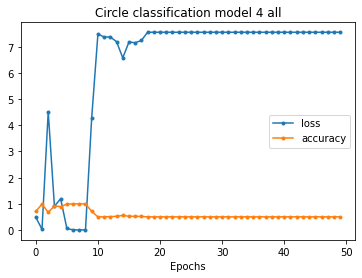

In [227]:
_custom.evaluation.history_plot(circle_m4_h, scatter_node = True,
                                path = "./saved_files/NNCSummary/circle/model_4",
                                name = "Circle_Classification_Model_4")

In [228]:
print(f"Training Loss:{circle_m4_h.history['loss'][-1]} vs Evaluation Loss:{eval_circle_m4[0]}")
print(f"Training Accuracy:{circle_m4_h.history['accuracy'][-1]} vs Evaluation Accuracy:{eval_circle_m4[1]}")

Training Loss:7.554089069366455 vs Evaluation Loss:7.906731128692627
Training Accuracy:0.5046250224113464 vs Evaluation Accuracy:0.4814999997615814


In [369]:
_custom.load_save.save(path = "./saved_files/NNCSummary/circle/model_4/", 
                       history = circle_m4_h,
                       model = circle_m4,
                       name = "Circle_Classification_Model_4")

Model Saved @ ./saved_files/NNCSummary/circle/model_4/Circle_Classification_Model_4.h5
Model History Saved @ ./saved_files/NNCSummary/circle/model_4/Circle_Classification_Model_4.json


## Model Summary

Plot

<Figure size 2160x2160 with 0 Axes>

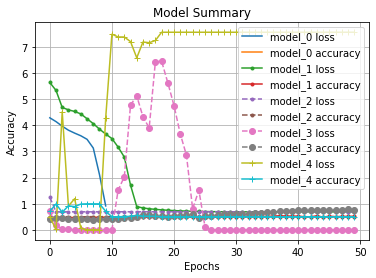

In [345]:
plt.figure(figsize=(30, 30))
ax = pd.DataFrame(circle_m0_h.history).plot(title = "Model Summary")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
pd.DataFrame(circle_m1_h.history).plot(ax = ax, style = ".-")
pd.DataFrame(circle_m2_h.history).plot(ax = ax, style = ".--")
pd.DataFrame(circle_m3_h.history).plot(ax = ax, style = "o--")
pd.DataFrame(circle_m4_h.history).plot(ax = ax, style = "+-")

path = "./saved_files/NNCSummary/circle/model_summary/"
plt.legend()
plt.grid(True)
os.makedirs(path, exist_ok = True)
plt.savefig(path + "model_summary.jpeg")
plt.legend(["model_0 loss", "model_0 accuracy",
           "model_1 loss", "model_1 accuracy",
           "model_2 loss", "model_2 accuracy",
           "model_3 loss", "model_3 accuracy",
           "model_4 loss", "model_4 accuracy"])
plt.show()

Table

In [246]:
model = "circle_m"
cModel = 5

model_data = []
variable = vars()
for x in range(cModel):
  data = (variable[model + str(x)]).evaluate(x_test, y_test, verbose = 0)
  loss = data[0]
  accuracy = data[1]
  model_data.append([("Model " + str(x)), np.around(loss, 3), np.around(accuracy, 3)])

pd.DataFrame.to_csv(pd.DataFrame(model_data, columns = ["Model", "Loss", "Accuracy"]),
                    "./saved_files/NNCSummary/circle/model_summary/circle_data.csv")
pd.DataFrame(model_data, columns = ["Model", "Loss", "Accuracy"])

,Model,Loss,Accuracy
0,Model 0,0.887,0.481
1,Model 1,0.693,0.481
2,Model 2,0.694,0.478
3,Model 3,0.001,0.770
4,Model 4,7.907,0.481


Understanding the Prediction of the Model

313/313 [==============================] - 1s 3ms/step


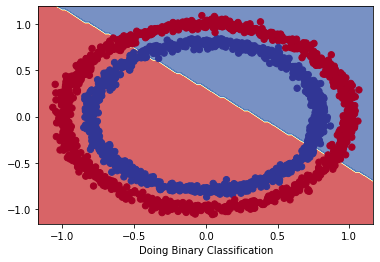

In [268]:
_custom.evaluation.plot_decision_boundary(circle_m0, x_test, y_test,
                                          path = "./saved_files/NNCSummary/circle/model_0/",
                                          name = "Decision_Boundary_Model_0")

313/313 [==============================] - 1s 3ms/step


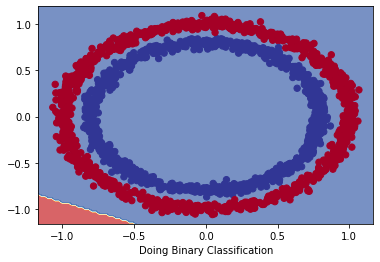

In [269]:
_custom.evaluation.plot_decision_boundary(circle_m1, x_test, y_test,
                                          path = "./saved_files/NNCSummary/circle/model_1/",
                                          name = "Decision_Boundary_Model_1")

313/313 [==============================] - 1s 3ms/step


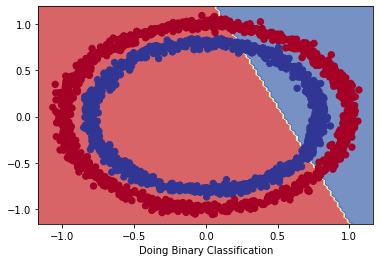

In [270]:
_custom.evaluation.plot_decision_boundary(circle_m2, x_test, y_test,
                                          path = "./saved_files/NNCSummary/circle/model_2/",
                                          name = "Decision_Boundary_Model_2")

313/313 [==============================] - 1s 3ms/step


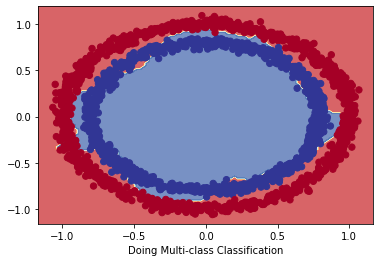

In [271]:
_custom.evaluation.plot_decision_boundary(circle_m3, x_test, y_test, 
                                          path = "./saved_files/NNCSummary/circle/model_3/",
                                          name = "Decision_Boundary_Model_3")

313/313 [==============================] - 1s 2ms/step


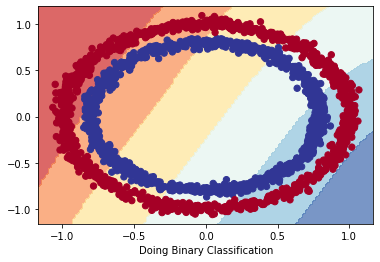

In [272]:
_custom.evaluation.plot_decision_boundary(circle_m4, x_test, y_test,
                                          path = "./saved_files/NNCSummary/circle/model_4/",
                                          name = "Decision_Boundary_Model_4")

# Chapter 2:

## Understanding Activators

([<matplotlib.lines.Line2D at 0x29dce898850>],
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-2.1      , -1.89     , -1.68     , -1.4699999, -1.26     ,
        -1.05     , -0.84     , -0.63     , -0.42     , -0.21     ,
         0.       ,  0.21     ,  0.42     ,  0.63     ,  0.84     ,
         1.05     ,  1.26     ,  1.4699999,  1.68     ,  1.89     ],
       dtype=float32)>)

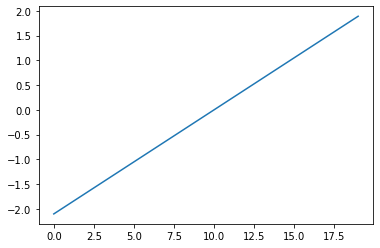

In [3]:
var = tf.cast(tf.range(-10, 10), dtype = tf.float32) * .21
plt.plot(tf.sort(var)), var

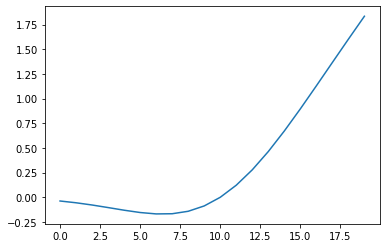

In [4]:
data = tf.keras.activations.gelu(var)
plt.plot(data)

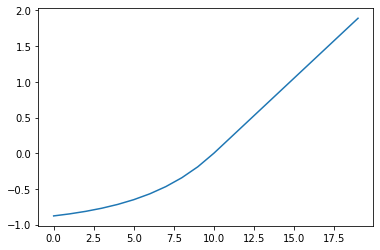

In [5]:
data = tf.keras.activations.elu(var)
plt.plot(data)

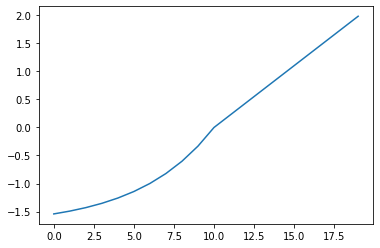

In [7]:
data = tf.keras.activations.selu(var)
plt.plot(data)

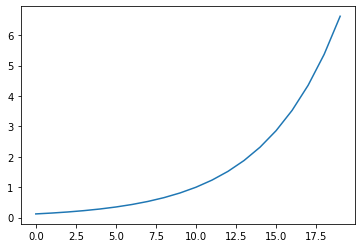

In [9]:
data = tf.keras.activations.exponential(var)
plt.plot(data)

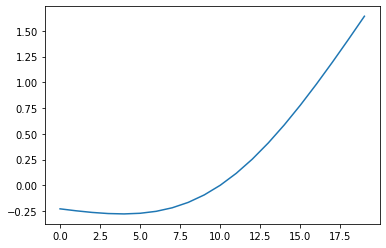

In [10]:
data = tf.keras.activations.swish(var)
plt.plot(data)

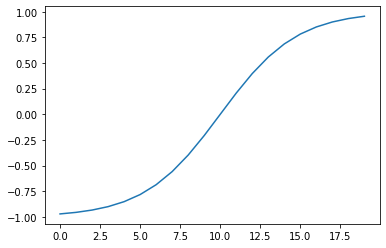

In [12]:
data = tf.keras.activations.tanh(var)
plt.plot(data)

In [274]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
sigmoid(var)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.10909683, 0.13124447, 0.15709548, 0.18694264, 0.22097391,
       0.2592251 , 0.3015348 , 0.34751052, 0.39651677, 0.4476921 ,
       0.5       , 0.5523079 , 0.60348326, 0.6524895 , 0.6984652 ,
       0.74077487, 0.77902615, 0.81305736, 0.84290457, 0.8687555 ],
      dtype=float32)>

In [275]:
tf.keras.activations.sigmoid(var)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.10909683, 0.13124448, 0.15709548, 0.18694264, 0.22097391,
       0.2592251 , 0.3015348 , 0.34751055, 0.39651677, 0.44769207,
       0.5       , 0.5523079 , 0.60348326, 0.6524894 , 0.69846517,
       0.74077487, 0.77902615, 0.81305736, 0.8429045 , 0.8687555 ],
      dtype=float32)>

In [276]:
sigmoid(var) == tf.keras.activations.sigmoid(var)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True])>

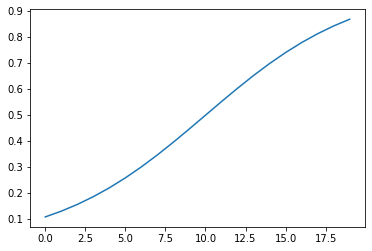

In [277]:
plt.plot(sigmoid(var))

In [278]:
tf.keras.activations.relu(var)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.21     ,
       0.42     , 0.63     , 0.84     , 1.05     , 1.26     , 1.4699999,
       1.68     , 1.89     ], dtype=float32)>

([<matplotlib.lines.Line2D at 0x182c6928280>],
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.21     ,
        0.42     , 0.63     , 0.84     , 1.05     , 1.26     , 1.4699999,
        1.68     , 1.89     ], dtype=float32)>)

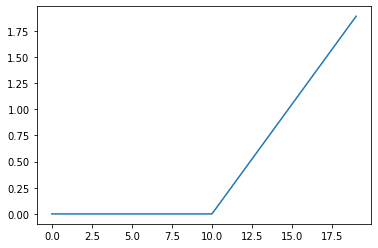

In [279]:
def relu(x):
  return tf.maximum(0, x)
plt.plot(relu(var)), relu(var)

## Understanding Learning Rate
- Learning Rate Callback
- Modified loss curves plot

In [280]:
lr_m1 = tf.keras.Sequential()
lr_m1.add(tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_1"))
lr_m1.add(tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_2"))
lr_m1.add(tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer"))

lr_m1.compile(
  loss = "binary_crossentropy",
  optimizer = "Adam",
  metrics = "accuracy"
)

# Create Learning Callback
  # every epoch traverse a set of learning rate values from 1e-4 and increasing by 10 to the power of epoch divide by 20
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

lr_m1_h = lr_m1.fit(x_train, y_train, epochs = 100, callbacks = [lr_scheduler], verbose = 2)

Epoch 1/100
250/250 - 2s - loss: 0.7038 - accuracy: 0.5052 - lr: 1.0000e-04 - 2s/epoch - 8ms/step
Epoch 2/100
250/250 - 1s - loss: 0.7005 - accuracy: 0.4952 - lr: 1.1220e-04 - 789ms/epoch - 3ms/step
Epoch 3/100
250/250 - 1s - loss: 0.6980 - accuracy: 0.4967 - lr: 1.2589e-04 - 753ms/epoch - 3ms/step
Epoch 4/100
250/250 - 1s - loss: 0.6961 - accuracy: 0.4974 - lr: 1.4125e-04 - 698ms/epoch - 3ms/step
Epoch 5/100
250/250 - 1s - loss: 0.6944 - accuracy: 0.4978 - lr: 1.5849e-04 - 688ms/epoch - 3ms/step
Epoch 6/100
250/250 - 1s - loss: 0.6928 - accuracy: 0.5027 - lr: 1.7783e-04 - 763ms/epoch - 3ms/step
Epoch 7/100
250/250 - 1s - loss: 0.6912 - accuracy: 0.5055 - lr: 1.9953e-04 - 735ms/epoch - 3ms/step
Epoch 8/100
250/250 - 1s - loss: 0.6895 - accuracy: 0.5091 - lr: 2.2387e-04 - 761ms/epoch - 3ms/step
Epoch 9/100
250/250 - 1s - loss: 0.6876 - accuracy: 0.5130 - lr: 2.5119e-04 - 729ms/epoch - 3ms/step
Epoch 10/100
250/250 - 1s - loss: 0.6855 - accuracy: 0.5194 - lr: 2.8184e-04 - 767ms/epoch - 3

History Plot Saved @ ./saved_files/NNCSummary/lr/lr_model_all.jpeg


<Figure size 720x720 with 0 Axes>

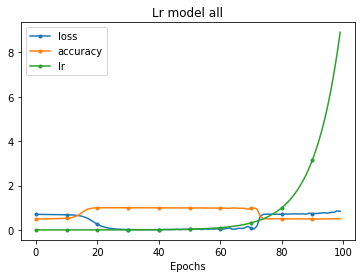

In [318]:
_custom.evaluation.history_plot(lr_m1_h, scatter_node = True, markevery = 10,
                                path = "./saved_files/NNCSummary/lr/",
                                name = "lr_model")

In [312]:
lr_m1_h.history['lr']

[1e-04,
 0.000112201844,
 0.00012589255,
 0.00014125375,
 0.00015848932,
 0.00017782794,
 0.00019952623,
 0.00022387212,
 0.00025118864,
 0.0002818383,
 0.00031622776,
 0.00035481338,
 0.00039810716,
 0.00044668358,
 0.0005011872,
 0.0005623413,
 0.00063095737,
 0.0007079458,
 0.0007943282,
 0.00089125097,
 0.001,
 0.0011220184,
 0.0012589254,
 0.0014125375,
 0.0015848932,
 0.0017782794,
 0.0019952622,
 0.0022387211,
 0.0025118864,
 0.002818383,
 0.0031622776,
 0.003548134,
 0.0039810715,
 0.004466836,
 0.0050118724,
 0.0056234132,
 0.0063095735,
 0.007079458,
 0.007943282,
 0.008912509,
 0.01,
 0.011220184,
 0.012589254,
 0.014125375,
 0.015848933,
 0.017782794,
 0.019952623,
 0.022387212,
 0.025118865,
 0.028183829,
 0.031622775,
 0.035481337,
 0.039810717,
 0.044668358,
 0.050118722,
 0.056234132,
 0.06309573,
 0.070794575,
 0.07943282,
 0.0891251,
 0.1,
 0.11220185,
 0.12589253,
 0.14125375,
 0.15848932,
 0.17782794,
 0.19952624,
 0.22387211,
 0.25118864,
 0.2818383,
 0.31622776,
 

Learning Plot Saved @ ./saved_files/NNCSummary/lr/Learning_Rate_1.jpeg


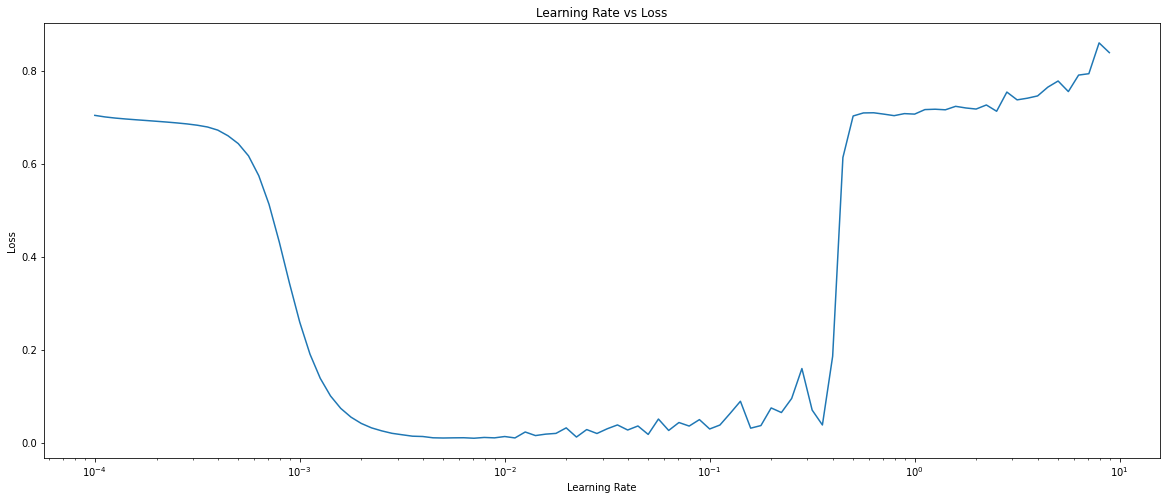

In [320]:
_custom.evaluation.learning_rate_plot(lr_m1_h, epochs = 100, divisible = 20, figsize = (20, 8),
                                      path = "./saved_files/NNCSummary/lr/",
                                      name = "Learning_Rate_1")

Learning Plot Saved @ ./saved_files/NNCSummary/lr/Learning_Rate_2.jpeg


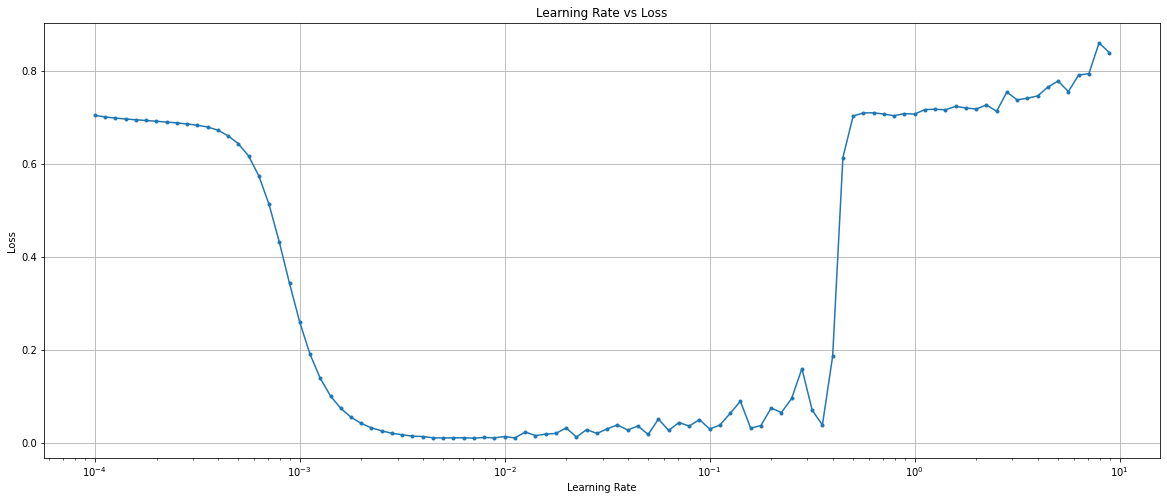

In [340]:
_custom.evaluation.learning_rate_plot(lr_m1_h, epochs = 100, divisible = 20,
                                      figsize = (20, 8), grid = True, scatter_node = True,
                                      path = "./saved_files/NNCSummary/lr/",
                                      name = "Learning_Rate_2")

In [364]:
_custom.load_save.save("./saved_files/NNCSummary/lr/", "lr_eval",
                       lr_m1_h, lr_m1)

Model Saved @ ./saved_files/NNCSummary/lr/lr_eval.h5
Model History Saved @ ./saved_files/NNCSummary/lr/lr_eval.json


## Applying Learning Rate

In [346]:
lr_m2 = tf.keras.Sequential()
lr_m2.add(tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_1"))
lr_m2.add(tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_2"))
lr_m2.add(tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer"))

lr_m2.compile(
  loss = "binary_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.008),
  metrics = "accuracy"
)

lr_m2_h = lr_m2.fit(x_train, y_train, epochs = 25, verbose = 2)

Epoch 1/25
250/250 - 2s - loss: 0.5877 - accuracy: 0.7060 - 2s/epoch - 8ms/step
Epoch 2/25
250/250 - 1s - loss: 0.1300 - accuracy: 0.9870 - 701ms/epoch - 3ms/step
Epoch 3/25
250/250 - 1s - loss: 0.0289 - accuracy: 0.9981 - 682ms/epoch - 3ms/step
Epoch 4/25
250/250 - 1s - loss: 0.0180 - accuracy: 0.9973 - 676ms/epoch - 3ms/step
Epoch 5/25
250/250 - 1s - loss: 0.0129 - accuracy: 0.9981 - 703ms/epoch - 3ms/step
Epoch 6/25
250/250 - 1s - loss: 0.0134 - accuracy: 0.9969 - 697ms/epoch - 3ms/step
Epoch 7/25
250/250 - 1s - loss: 0.0153 - accuracy: 0.9959 - 670ms/epoch - 3ms/step
Epoch 8/25
250/250 - 1s - loss: 0.0092 - accuracy: 0.9974 - 680ms/epoch - 3ms/step
Epoch 9/25
250/250 - 1s - loss: 0.0104 - accuracy: 0.9974 - 687ms/epoch - 3ms/step
Epoch 10/25
250/250 - 1s - loss: 0.0093 - accuracy: 0.9973 - 686ms/epoch - 3ms/step
Epoch 11/25
250/250 - 1s - loss: 0.0142 - accuracy: 0.9949 - 711ms/epoch - 3ms/step
Epoch 12/25
250/250 - 1s - loss: 0.0084 - accuracy: 0.9967 - 736ms/epoch - 3ms/step
Epoc

History Plot Saved @ ./saved_files/NNCSummary/lr/applied_lr_model_all.jpeg


<Figure size 720x720 with 0 Axes>

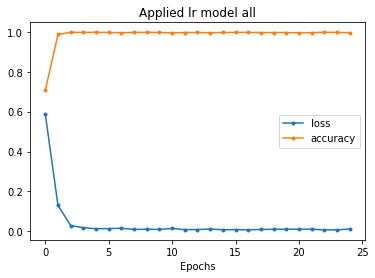

In [370]:
_custom.evaluation.history_plot(lr_m2_h, scatter_node = True, markevery = 1,
                                path = "./saved_files/NNCSummary/lr/",
                                name = "applied_lr_model")

313/313 [==============================] - 1s 2ms/step


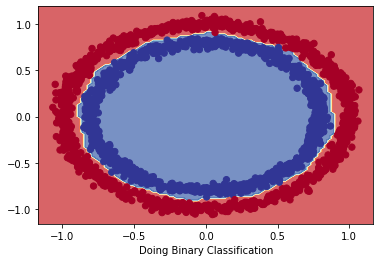

In [355]:
_custom.evaluation.plot_decision_boundary(lr_m2, x_test, y_test,
                                          path = "./saved_files/NNCSummary/lr/",
                                          name = "Decision_Boundary_Model_2")

In [371]:
_custom.load_save.save("./saved_files/NNCSummary/lr/", "applied_lr",
                       lr_m2_h, lr_m2)

Model Saved @ ./saved_files/NNCSummary/lr/applied_lr.h5
Model History Saved @ ./saved_files/NNCSummary/lr/applied_lr.json


## Classification Evaluation

- Accuracy, (Default) Not the best for imbalance classes
- Precision, Higher Precision to less false positives
  - false positives are positive but not true positives
- Recall, less false negatives
- F1-score, good for overall metrics
- Confusion Matrix, comparing truth labels to predictions to check where model is confused, hard to use in large of classes
- Classification Report (Sckitlearn library)

> Load the Non-linear Model

> Run all code in Create Data to view fit -> Binary Classification: Circle Classification -> Data Preparations